In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from dhdrnet.expected_steps import num_exposures_needed
import pandas as pd

In [3]:
df = num_exposures_needed(runs=500)
df

,metric,num_exposures,error
image_name,,,
0043_20160919_140610_616,psnr,1,7.245790
0043_20160919_140610_616,mse,1,12260.308029
0043_20160919_140610_616,sssim,1,0.355150
0043_20160919_140610_616,psnr,2,7.045839
0043_20160919_140610_616,mse,2,12837.972925
...,...,...,...
0155_20160816_114911_369,mse,5,1678.773960
0155_20160816_114911_369,sssim,5,0.904685
0155_20160816_114911_369,psnr,6,23.270790


In [4]:
stats = df.groupby(["metric","num_exposures"]).describe()["error"].drop("count",axis=1)
stats

mean          std        min         25%  \
metric num_exposures                                                    
mse    1              3474.073362  3853.248159  23.744126  449.997960   
       2              2260.923828  3015.843608   4.384672  288.475150   
       3              1574.867993  2421.942911   3.304258  188.612919   
       4              1118.562032  1785.761718   6.910735  155.810212   
       5               793.472097  1377.999026   7.585378   94.172528   
       6               583.296697  1024.861731   2.558349   80.587318   
psnr   1                16.393416     6.452302   6.470420   10.870835   
       2                18.783955     6.685045   6.416054   13.345915   
       3                20.557789     6.581760   6.737377   15.712239   
       4                21.782207     6.341851   7.419885   16.933045   
       5                23.639801     6.345882   7.754924   19.203010   
       6                24.625003     6.128339   9.381708   20.293325   
sssim  1                 0.718822     0.272602   0.030667    0.529901   
       2                 0.799575     0.234686   0.039838    0.723852   
       3                 0.850721     0.201178   0.028980    0.829650   
       4                 0.891684     0.153854   0.111053    0.889421   
       5                 0.922599     0.118242   0.190204    0.924832   
       6                 0.938665     0.103346   0.319563    0.938326   

                              50%          75%           max  
metric num_exposures                                          
mse    1              1715.386766  5321.119435  14656.771315  
       2               806.596428  3009.493296  14841.404244  
       3               545.440175  1745.305150  13782.966796  
       4               417.418777  1317.586470  11778.551164  
       5               245.072439   781.242598  10904.052095  
       6               219.065973   607.784229   7497.380370  
psnr   1                15.787326    21.598703     34.375242  
       2                19.064258    23.529765     41.711433  
       3                20.763549    25.375111     42.940064  
       4                21.925125    26.204974     39.735561  
       5                24.237862    28.391681     39.331031  
       6                24.725117    29.068511     44.051205  
sssim  1                 0.831915     0.942813      0.987464  
       2                 0.915459     0.959309      0.993982  
       3                 0.942082     0.972439      0.996080  
       4                 0.951930     0.977212      0.997728  
       5                 0.966887     0.982963      0.996507  
       6                 0.974249     0.986347      0.998082

metric
mse      [AxesSubplot(0.125,0.797073;0.775x0.0829268), ...
psnr     [AxesSubplot(0.125,0.797073;0.775x0.0829268), ...
sssim    [AxesSubplot(0.125,0.797073;0.775x0.0829268), ...
dtype: object

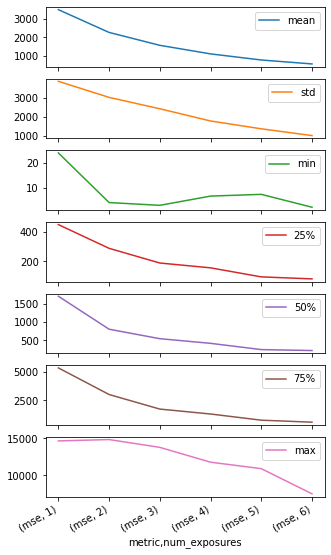

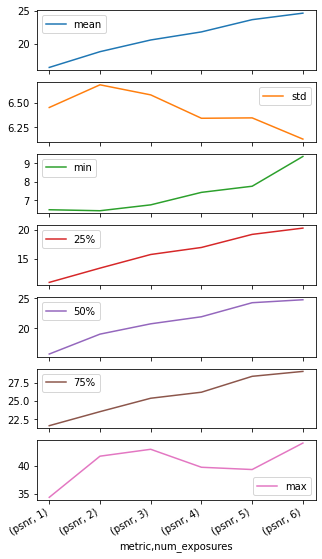

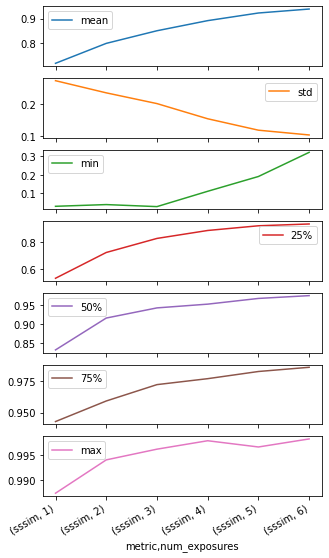

In [5]:
stats.groupby("metric").plot(subplots=True,figsize=(5,10))

In [6]:
from dhdrnet.util import ROOT_DIR
df.to_csv(ROOT_DIR / "precomputed_data" / "expected_captures.csv")